In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales_df = pd.read_csv('export_tabel_all_superstore.csv')

In [4]:
sales_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,country,city,state,postal_code,...,product_id,sales,quantity,discount,profit,customer_name,segment,category,sub_category,product_name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,261.960,2,0.00,41.9136,Claire Gute,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,United States,Coral Springs,Florida,33065,...,FUR-BO-10001798,314.352,3,0.20,-15.7176,Arthur Gainer,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,United States,Philadelphia,Pennsylvania,19140,...,FUR-BO-10001798,130.980,2,0.50,-89.0664,Seth Vernon,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase
3,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,United States,Los Angeles,California,90004,...,FUR-BO-10001798,556.665,5,0.15,6.5490,Herbert Flentye,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase
4,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,731.940,3,0.00,219.5820,Claire Gute,Consumer,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9990 non-null   int64  
 1   order_id       9990 non-null   object 
 2   order_date     9990 non-null   object 
 3   ship_date      9990 non-null   object 
 4   ship_mode      9990 non-null   object 
 5   customer_id    9990 non-null   object 
 6   country        9990 non-null   object 
 7   city           9990 non-null   object 
 8   state          9990 non-null   object 
 9   postal_code    9990 non-null   int64  
 10  region         9990 non-null   object 
 11  product_id     9990 non-null   object 
 12  sales          9990 non-null   float64
 13  quantity       9990 non-null   int64  
 14  discount       9990 non-null   float64
 15  profit         9990 non-null   float64
 16  customer_name  9990 non-null   object 
 17  segment        9990 non-null   object 
 18  category

In [6]:
sales_df[['order_date', 'ship_date']] = sales_df[['order_date', 'ship_date']].apply(pd.to_datetime)

In [7]:
# kolom order => day, month, quarter, year
sales_df['order_day'] = sales_df['order_date'].dt.strftime('%m-%d')
sales_df['order_month'] = sales_df['order_date'].dt.strftime('%Y-%m')
sales_df['order_quarter'] = sales_df['order_date'].dt.to_period('Q')
sales_df['order_year'] = sales_df['order_date'].dt.year

### Daily Reporting - December 2017
#### Aggregasi total sales, Aggregasi sales bersih per harian

In [8]:
sales_daily = sales_df[sales_df['order_month'] == '2017-12'] \
                .groupby('order_date').aggregate({'sales':'sum','profit':'sum'})
sales_daily.head()

,sales,profit
order_date,,
2017-12-01,5331.178,718.8920
2017-12-02,9951.182,-7.3410
2017-12-03,1403.842,280.7407
2017-12-04,2639.638,-21.9881
2017-12-05,1453.136,447.6235


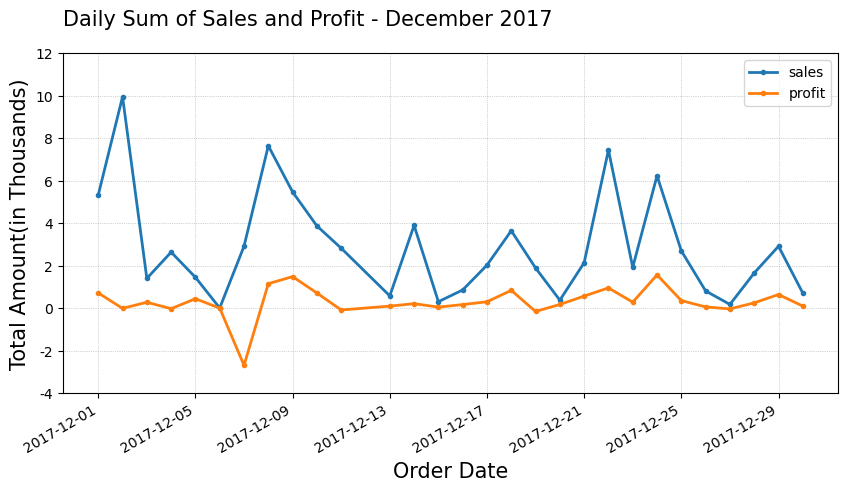

In [9]:
sales_daily.plot(figsize=(10,5), marker='.', linewidth=2)

plt.xlabel("Order Date", fontsize=15)
plt.ylabel("Total Amount(in Thousands)", fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))

plt.title("Daily Sum of Sales and Profit - December 2017", loc='left', pad=20, fontsize=15)
plt.show()

### Monthly Reporting - 2017
#### Aggregasi total sales, Aggregasi sales bersih per bulan

In [10]:
sales_monthly = sales_df[sales_df["order_year"] == 2017] \
                .groupby('order_month')[['sales', 'profit']].sum()
sales_monthly.head()

,sales,profit
order_month,,
2017-01,43971.3740,7140.4391
2017-02,20301.1334,1613.8720
2017-03,58872.3528,14751.8915
2017-04,36521.5361,933.2900
2017-05,44261.1102,6342.5828


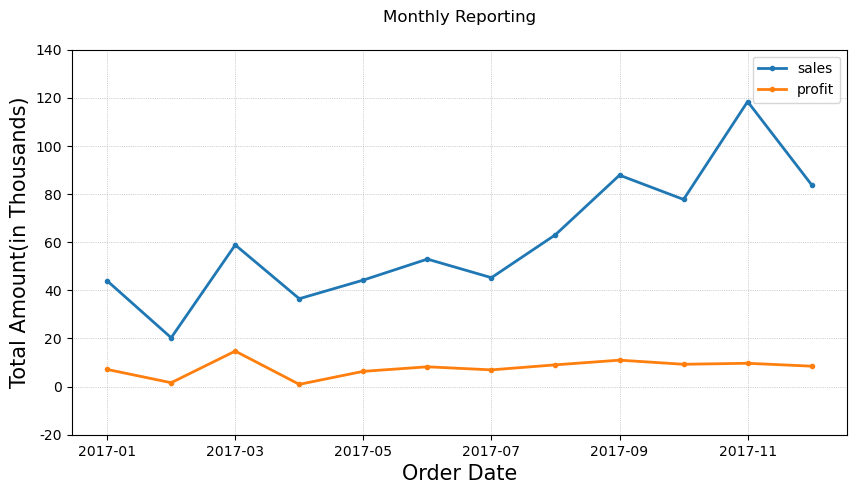

In [11]:
sales_monthly.plot(figsize=(10,5), marker='.', linewidth=2)

plt.xlabel("Order Date", fontsize=15)
plt.ylabel("Total Amount(in Thousands)", fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))

plt.title("Monthly Reporting", pad=20)
plt.show()

### Quarterly reporting - 2017
#### Aggregasi total sales, Aggregasi sales bersih per 3 bulanan

In [12]:
sales_quarterly = sales_df[sales_df['order_year'] == 2017].groupby('order_quarter')[['sales', 'profit']].sum()
sales_quarterly.head()

,sales,profit
order_quarter,,
2017Q1,123144.8602,23506.2026
2017Q2,133764.3720,15499.2085
2017Q3,196251.9560,26985.1325
2017Q4,280054.0670,27448.7260


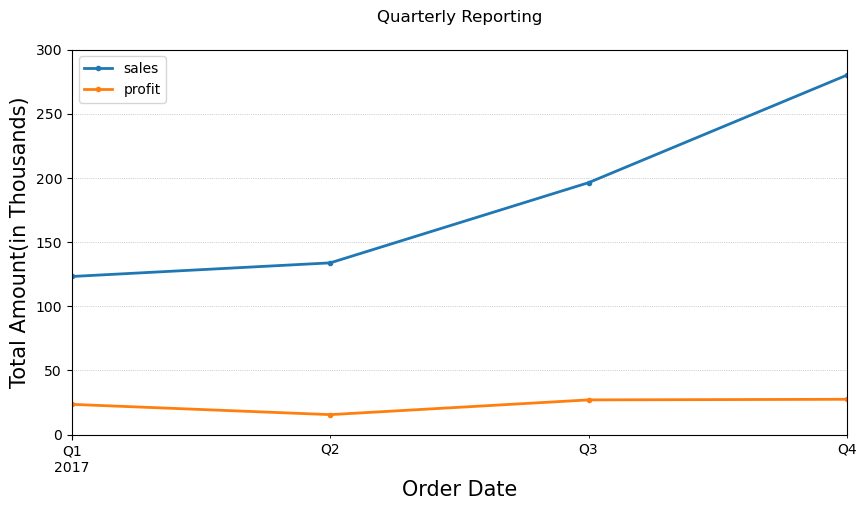

In [13]:
sales_quarterly.plot(figsize=(10,5), marker='.', linewidth=2)

plt.xlabel("Order Date", fontsize=15)
plt.ylabel("Total Amount(in Thousands)", fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))

plt.title("Quarterly Reporting", pad=20)
plt.show()

### Yearly reporting - 2014 sampai 2017
#### Aggregasi total sales, Aggregasi sales bersih per tahun

In [14]:
sales_yearly = sales_df['sales'].groupby(sales_df['order_year']).sum()

sales_yearly.head()

order_year
2014    484207.4181
2015    470532.5090
2016    606373.0480
2017    733215.2552
Name: sales, dtype: float64

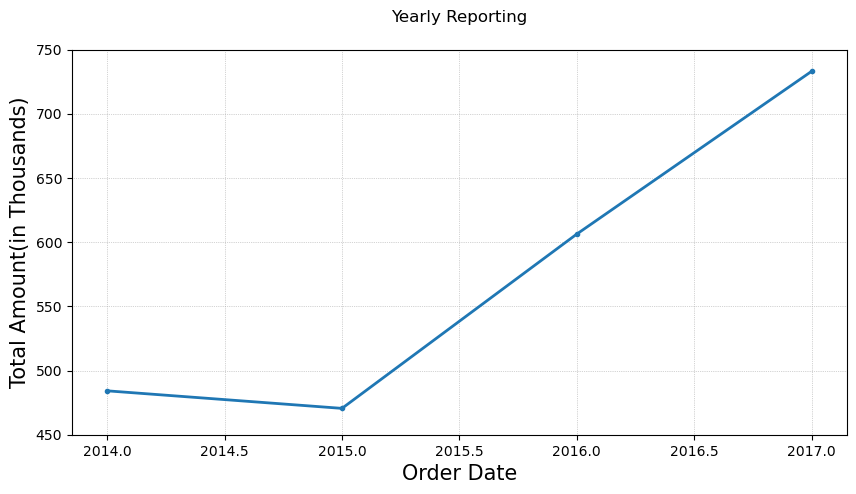

In [15]:
sales_yearly.plot(figsize=(10,5), marker='.', linewidth=2)

plt.xlabel("Order Date", fontsize=15)
plt.ylabel("Total Amount(in Thousands)", fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
# plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))

plt.title("Yearly Reporting", pad=20)
plt.show()

### Daily Number of Customer - December 2017
#### Mendapatkan jumlah kustomer setiap harinya 

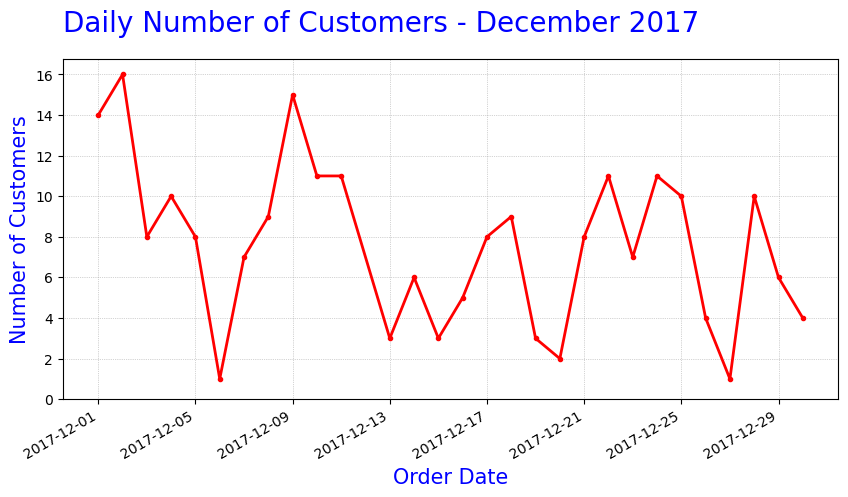

In [16]:
plt.figure(figsize=(10, 5))

sales_df[sales_df['order_month']=='2017-12'].groupby(['order_date'])\
    ['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)

plt.title('Daily Number of Customers - December 2017',\
          loc='left', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

plt.show()

### Segmentasi Customer
#### Laporan segmentasi customer yang berbelanja: Bronze < USD 200 , USD 200 < Silver < USD 500 , Gold > USD 500 /3 bulan.

In [17]:
segmentasi_customer = sales_df.groupby(['order_quarter', 'customer_id'])[['sales']] \
                        .sum() \
                        .reset_index() 

segmentasi_customer.head()

,order_quarter,customer_id,sales
0,2014Q1,AA-10315,726.548
1,2014Q1,AB-10015,322.216
2,2014Q1,AB-10150,705.562
3,2014Q1,AJ-10780,54.830
4,2014Q1,AJ-10945,19.456


In [18]:
segmentasi_customer['category'] = segmentasi_customer['sales']\
                                    .apply(lambda x: 'Bronze' if x < 200\
                                        else ('Silver' if x < 500  else 'Gold'))
segmentasi_customer

,order_quarter,customer_id,sales,category
0,2014Q1,AA-10315,726.548,Gold
1,2014Q1,AB-10015,322.216,Silver
2,2014Q1,AB-10150,705.562,Gold
3,2014Q1,AJ-10780,54.830,Bronze
4,2014Q1,AJ-10945,19.456,Bronze
...,...,...,...,...
4028,2017Q4,WB-21850,137.113,Bronze
4029,2017Q4,XP-21865,449.312,Silver
4030,2017Q4,YC-21895,750.680,Gold
4031,2017Q4,YS-21880,1000.020,Gold


#### Segmentasi Customer - Q4 - 2017

In [19]:
segmentasi_customer_q4_count = segmentasi_customer[segmentasi_customer['order_quarter']=='2017Q4'] \
                                .groupby(['order_quarter','category'])[['customer_id']]\
                                .count() \
                                .reset_index() \
                                .rename(columns = {'customer_id':'customers'})
segmentasi_customer_q4_count

,order_quarter,category,customers
0,2017Q4,Bronze,185
1,2017Q4,Gold,153
2,2017Q4,Silver,98


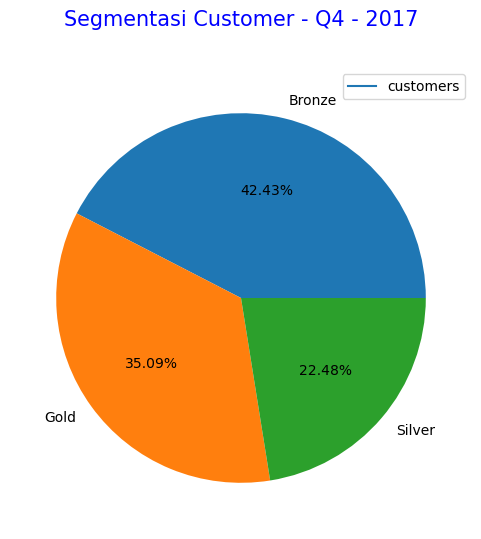

In [20]:
segmentasi_customer_q4_count.plot(figsize=(6,6))
plt.pie(segmentasi_customer_q4_count['customers'], labels=segmentasi_customer_q4_count['category'], autopct='%1.2f%%')
plt.title('Segmentasi Customer - Q4 - 2017', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

#### Histogram

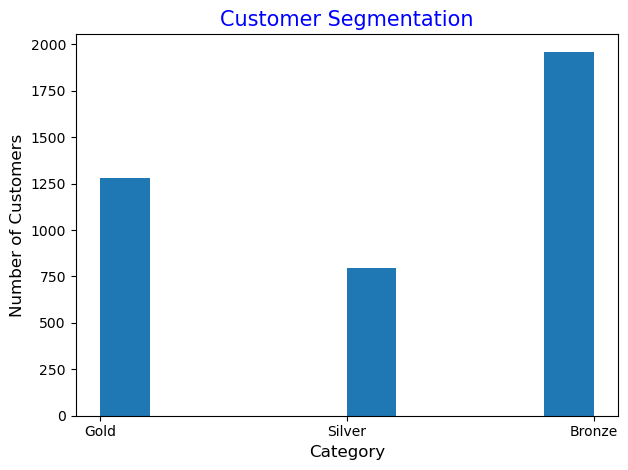

In [21]:
plt.figure()
plt.hist(segmentasi_customer['category'])
plt.title('Customer Segmentation', fontsize=15, color='blue')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()


### Segmentasi Product
#### Laporan segmentasi produk dengan penjualan : 3nd Product < 5 , 5 < 2nd Product < 10 , 1st Product > 10 /bulan secara per toko dan per regional.

In [22]:
segmentasi_product = sales_df.groupby(['order_month', 'city', 'region', 'product_id'])[['quantity', 'sales']]\
                        .sum() \
                        .reset_index() \
                        .sort_values(by='quantity', ascending=False)

segmentasi_product

,order_month,city,region,product_id,quantity,sales
4309,2016-03,Jackson,South,OFF-PA-10001954,16,365.440
2744,2015-07,Louisville,South,OFF-BI-10000069,15,225.150
8962,2017-10,Rockford,Central,FUR-CH-10002304,14,254.604
8981,2017-10,San Francisco,West,OFF-AP-10002684,14,1702.120
2156,2015-03,Jacksonville,South,OFF-PA-10002254,14,295.456
...,...,...,...,...,...,...
6718,2017-01,Jackson,Central,TEC-PH-10003601,1,164.990
2984,2015-08,Springfield,East,FUR-FU-10000193,1,25.984
5144,2016-07,Philadelphia,East,OFF-BI-10000301,1,1.941
6721,2017-01,Jacksonville,South,OFF-EN-10002504,1,21.744


In [23]:
segmentasi_product['category'] = segmentasi_product['quantity'] \
                                .apply(lambda x: '3nd Product' if x < 5 \
                                       else('2nd Product'if x < 10 else '1st Product' ))
segmentasi_product

,order_month,city,region,product_id,quantity,sales,category
4309,2016-03,Jackson,South,OFF-PA-10001954,16,365.440,1st Product
2744,2015-07,Louisville,South,OFF-BI-10000069,15,225.150,1st Product
8962,2017-10,Rockford,Central,FUR-CH-10002304,14,254.604,1st Product
8981,2017-10,San Francisco,West,OFF-AP-10002684,14,1702.120,1st Product
2156,2015-03,Jacksonville,South,OFF-PA-10002254,14,295.456,1st Product
...,...,...,...,...,...,...,...
6718,2017-01,Jackson,Central,TEC-PH-10003601,1,164.990,3nd Product
2984,2015-08,Springfield,East,FUR-FU-10000193,1,25.984,3nd Product
5144,2016-07,Philadelphia,East,OFF-BI-10000301,1,1.941,3nd Product
6721,2017-01,Jacksonville,South,OFF-EN-10002504,1,21.744,3nd Product


#### Segmentasi Product - Desember 2017

In [24]:
segmentasi_product_des_count = segmentasi_product[segmentasi_product['order_month']=='2017-12']\
                        .groupby(['order_month','category'])[['product_id']].count().reset_index()

segmentasi_product_des_count.rename(columns = {'product_id':'count'}, inplace = True)

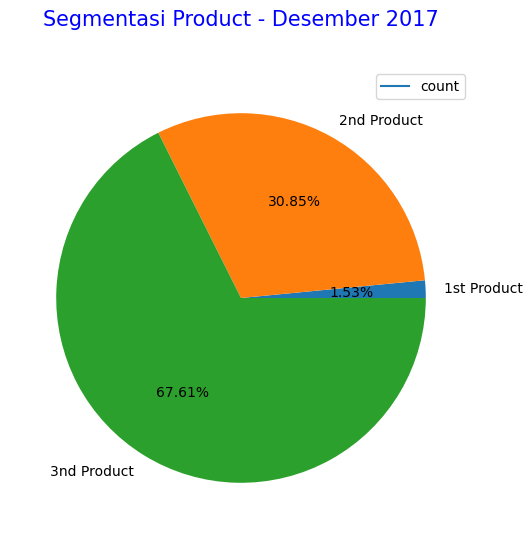

In [25]:
segmentasi_product_des_count.plot(figsize=(6,6))
plt.pie(segmentasi_product_des_count['count'], labels=segmentasi_product_des_count['category'], autopct='%1.2f%%')
plt.title('Segmentasi Product - Desember 2017', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

### Segmentasi Toko Cabang
#### Kemampuan segmentasi toko cabang dengan omzet : Kategori I  < USD 1000 , USD 1000 < Kategori II < USD 2000 , Kategori III   > USD 2000 /bulan

In [26]:
segmentasi_cabang = sales_df.groupby(['city', 'order_month'])[['sales']] \
                        .sum() \
                        .reset_index() \
                        .sort_values(by='sales', ascending=False)

segmentasi_cabang

,city,order_month,sales
1737,New York City,2017-10,24512.584
1131,Jacksonville,2014-03,23752.284
1213,Lafayette,2016-10,18336.740
1738,New York City,2017-11,17484.042
1714,New York City,2015-11,16573.884
...,...,...,...
1905,Pasadena,2017-06,1.624
1,Abilene,2017-12,1.392
2051,Portland,2017-07,1.080
1530,Mesquite,2014-09,0.876


In [27]:
segmentasi_cabang['category'] = segmentasi_cabang['sales']\
                                .apply(lambda x: 'Kategori I' if x < 1000 \
                                    else('Kategori II' if x < 2000 else 'Kategori III'))
segmentasi_cabang

,city,order_month,sales,category
1737,New York City,2017-10,24512.584,Kategori III
1131,Jacksonville,2014-03,23752.284,Kategori III
1213,Lafayette,2016-10,18336.740,Kategori III
1738,New York City,2017-11,17484.042,Kategori III
1714,New York City,2015-11,16573.884,Kategori III
...,...,...,...,...
1905,Pasadena,2017-06,1.624,Kategori I
1,Abilene,2017-12,1.392,Kategori I
2051,Portland,2017-07,1.080,Kategori I
1530,Mesquite,2014-09,0.876,Kategori I


#### Segmentasi Toko Cabang - Desember 2017

In [28]:
segmentasi_cabang_des = segmentasi_cabang[segmentasi_cabang['order_month']=='2017-12']\
                        .groupby(['category'])\
                        [['sales']].sum() \
                        .reset_index()
segmentasi_cabang_des

,category,sales
0,Kategori I,24528.0658
1,Kategori II,15683.5590
2,Kategori III,43617.6940


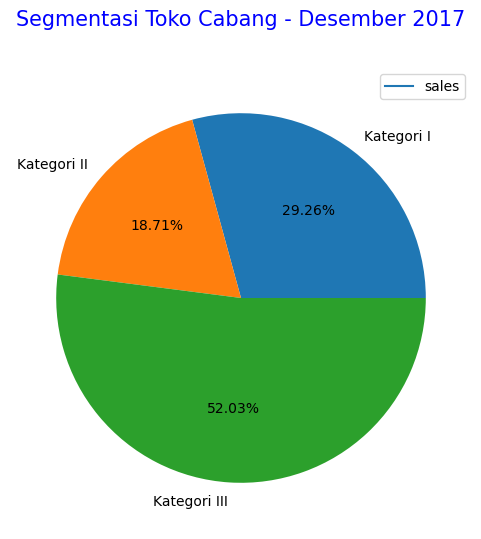

In [29]:
segmentasi_cabang_des.plot(figsize=(6,6))
plt.pie(segmentasi_cabang_des['sales'], labels=segmentasi_cabang_des['category'], autopct='%1.2f%%')
plt.title('Segmentasi Toko Cabang - Desember 2017', loc='center', pad=30, fontsize=15, color='blue')
plt.show()